In [20]:
# Listing 6.1 Downloading and unzipping the dataset
import urllib.request
import zipfile
import os
from pathlib import Path

url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path):
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return
    with urllib.request.urlopen(url) as response:          #A
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    with zipfile.ZipFile(zip_path, "r") as zip_ref:        #B
        zip_ref.extractall(extracted_path)

    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)          #C
    print(f"File downloaded and saved as {data_file_path}")

download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)


#A 下载数据集
#B 解压数据集
#C 为解压的数据集文件设置.csv文件扩展名

sms_spam_collection\SMSSpamCollection.tsv already exists. Skipping download and extraction.


In [21]:
print(data_file_path)            # 输出为: sms_spam_collection/SMSSpamCollection.tsv
print(type(data_file_path))      # <class 'pathlib.PosixPath'>


sms_spam_collection\SMSSpamCollection.tsv
<class 'pathlib.WindowsPath'>


In [22]:
with open(data_file_path, "r", encoding="utf-8") as f:
    first_line = f.readline()
    print(first_line)


ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...



In [23]:
with open(data_file_path, "r", encoding="utf-8") as f:
    for _ in range(5):
        print(f.readline().strip())


ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though


In [24]:
import pandas as pd
df = pd.read_csv(data_file_path, sep="\t", header=None, names=["Label", "Text"])
df      #A
#A 在 Jupyter Notebook 中可以直接渲染数据，或者用 print(df) 命令显示数据内容

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [25]:
print(df["Label"].value_counts())
# value_count() 统计这个列表中的元素个数

Label
ham     4825
spam     747
Name: count, dtype: int64


In [26]:
print(df["Text"].value_counts())

Text
Sorry, I'll call later                                                                                                                                         30
I cant pick the phone right now. Pls send a message                                                                                                            12
Ok...                                                                                                                                                          10
Okie                                                                                                                                                            4
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                        4
                                                                                                                                                               ..
No. On the way home. So

In [27]:
# Listing 6.2 Creating a balanced dataset
def create_balanced_dataset(df):
    num_spam = df[df["Label"] == "spam"].shape[0]                                 #A
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state=123)      #B
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])              #C
    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())
#sample（） ： n表示采样数量，frac 表示抽取的比例，n/frac不能同时使用。
# random_state表示设置随机种子保证每次采样结果一致
# replace表示是否有放回采样，默认为False

#A 统计垃圾短信的实例数量
#B 随机抽取正常邮件实例，使其数量与垃圾短信实例相同。
#C 将正常短信子集与垃圾短信合并

Label
ham     747
spam    747
Name: count, dtype: int64


In [28]:
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})

In [29]:
balanced_df,balanced_df["Label"].value_counts()

(      Label                                               Text
 4307      0  Awww dat is sweet! We can think of something t...
 4138      0                             Just got to  &lt;#&gt;
 4831      0  The word "Checkmate" in chess comes from the P...
 4461      0  This is wishing you a great day. Moji told me ...
 5440      0      Thank you. do you generally date the brothas?
 ...     ...                                                ...
 5537      1  Want explicit SEX in 30 secs? Ring 02073162414...
 5540      1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
 5547      1  Had your contract mobile 11 Mnths? Latest Moto...
 5566      1  REMINDER FROM O2: To get 2.50 pounds free call...
 5567      1  This is the 2nd time we have tried 2 contact u...
 
 [1494 rows x 2 columns],
 Label
 0    747
 1    747
 Name: count, dtype: int64)

In [30]:
def random_split(df,train_frac,val_frac):
    df = df.sample(frac=1,random_state=123).reset_index(drop = True)
    # 表示全采样 1表示100%，resetindex是因为全随机采样后，每一行的index就混乱了，
    # 我们希望还是全采样完之后还是按照1，2，3这样的顺序来排列，所以选择丢弃原有的index，重新排列
    train_end = int(len(df) * train_frac)
    val_end = train_end + int(len(df) * val_frac)

    train_set = df[:train_end]
    val_set = df[train_end:val_end]
    test_set = df[val_end:]

    return train_set,val_set,test_set

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)  #D
train_df.shape,validation_df.shape,test_df.shape

((1045, 2), (149, 2), (300, 2))

In [31]:
train_df.to_csv("train.csv", index=None)
validation_df.to_csv("validation.csv", index=None)
test_df.to_csv("test.csv", index=None)

## 6.3 创建数据加载器

In [32]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
#tiktoken 默认不允许你直接把特殊 token（如 <|endoftext|>）编码，除非明确允许。
#你需要通过 allowed_special 参数告诉 tokenizer 允许处理这些特殊 token。
tokenizer.encode("<|endoftext|>",allowed_special={"<|endoftext|>"}),tokenizer.n_vocab

([50256], 50257)

In [33]:
# Listing 6.4 Setting up a Pytorch Dataset class
import torch
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
        self.data = pd.read_csv(csv_file)

        self.encoded_texts = [                                      #A
            tokenizer.encode(text) for text in self.data["Text"]
        ]

        if max_length is None:
            self.max_length = self._longest_encoded_length()
        else:
            self.max_length = max_length

            self.encoded_texts = [                                  #B
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts
            ]

        self.encoded_texts = [                                      #C
            encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]

    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        label = self.data.iloc[index]["Label"]
        return (
            torch.tensor(encoded, dtype=torch.long),
            torch.tensor(label, dtype=torch.long)
        )

    def __len__(self):
        return len(self.data)

    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length


#A 对文本进行预分词
#B 若序列超过最大长度则进行截断
#C 将序列填充至最长序列长度

In [34]:
train_dataset = SpamDataset(
    csv_file="train.csv",
    max_length=None,
    tokenizer=tokenizer
)

In [ ]:
print(train_dataset.max_length)
# 表明最长序列为120，如果上下文限制为1024个token，可以处理最长1024个token序列

120


In [36]:
val_dataset = SpamDataset(
    csv_file="validation.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)
test_dataset = SpamDataset(
    csv_file="test.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)

In [37]:
# Listing 6.5 Creating PyTorch data loaders
from torch.utils.data import DataLoader

num_workers = 0                  #A
batch_size = 8
torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True,
)
val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

#A 此设置可确保与大多数计算机兼容

In [ ]:
for input_batch, target_batch in train_loader:
    pass
print("Input batch dimensions:", input_batch.shape)
print("Label batch dimensions", target_batch.shape)
# 输入批次包含 8 个训练样本，每个样本包含 120 个token。
# 标签张量存储了对应 8 个训练样本的类别标签。

Input batch dimensions: torch.Size([8, 120])
Label batch dimensions torch.Size([8])


In [39]:
print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

130 training batches
19 validation batches
38 test batches


In [40]:
CHOOSE_MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"
BASE_CONFIG = {
    "vocab_size": 50257, # Vocabulary size
    "context_length": 1024, # Context length
    "drop_rate": 0.0, # Dropout rate
    "qkv_bias": True # Query-key-value bias
}
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}
BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

assert train_dataset.max_length <= BASE_CONFIG["context_length"], (
    f"Dataset length {train_dataset.max_length} exceeds model's context "
    f"length {BASE_CONFIG['context_length']}. Reinitialize data sets with "
    f"`max_length={BASE_CONFIG['context_length']}`"
)

In [42]:
from llms_from_scratch.ch04 import GPTModel
from llms_from_scratch.ch05 import download_and_load_gpt2, load_weights_into_gpt

In [ ]:
from llms_from_scratch.ch04 import GPTModel
from llms_from_scratch.ch05 import download_and_load_gpt2, load_weights_into_gpt

model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings, params = download_and_load_gpt2(model_size=model_size, models_dir="gpt2")
model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval()

File already exists and is up-to-date: gpt2\124M\checkpoint
File already exists and is up-to-date: gpt2\124M\encoder.json
File already exists and is up-to-date: gpt2\124M\hparams.json
File already exists and is up-to-date: gpt2\124M\model.ckpt.data-00000-of-00001
File already exists and is up-to-date: gpt2\124M\model.ckpt.index
File already exists and is up-to-date: gpt2\124M\model.ckpt.meta
File already exists and is up-to-date: gpt2\124M\vocab.bpe


GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768,

In [45]:
print(model_size)

124M


In [46]:
from llms_from_scratch.ch04 import generate_text_simple
from llms_from_scratch.ch05 import text_to_token_ids, token_ids_to_text

In [47]:

text_1 = "Every effort moves you"
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_1, tokenizer),
    max_new_tokens=15,
    context_size=BASE_CONFIG["context_length"]
)
print(token_ids_to_text(token_ids, tokenizer))

Every effort moves you forward.

The first step is to understand the importance of your work


In [51]:
text_2 = (
    "Is the following text 'spam'? Answer with 'yes' or 'no':"
    " You are a winner you have been specially "
    "selected to receive $1000 cash or a $2000 award.'"
)
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_2, tokenizer),
    max_new_tokens=23,
    context_size=BASE_CONFIG["context_length"]
)
print(token_ids_to_text(token_ids, tokenizer))

Is the following text 'spam'? Answer with 'yes' or 'no': You are a winner you have been specially selected to receive $1000 cash or a $2000 award.'

'You have been specially selected to receive $1000 cash or a $2000 award.' 'You have been


In [52]:
model

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_resid): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768,

由于我们从预训练模型开始，并不需要对所有模型层进行微调。这是因为，在基于神经网络的语言模型中，低层通常捕捉到的是基本的语言结构和语义，这些特征适用于多种任务和数据集。因此，只微调最后几层（接近输出层），它们更专注于细致的语言模式和任务特定的特征，通常就足够使模型适应新任务。此外，微调较少的层在计算上也更加高效。

In [55]:
for param in model.parameters():
    param.requires_grad=False
# To achieve this, we first freeze the model, 
# meaning that we make all layers non-trainable

In [56]:
num_class = 2

model.out_head = torch.nn.Linear(in_features=BASE_CONFIG["emb_dim"],out_features=num_class)
for params in model.final_norm.parameters():
    params.requires_grad = True
for params in model.trf_blocks[-1].parameters():
    params.requires_grad = True
# 从技术上讲，训练我们刚添加的输出层已经足够。
# 然而，通过实验我发现，微调更多层能够显著提升微调后模型的预测性能
# 我们还需将最后一个 Transformer 模块以及连接该模块和输出层的 LayerNorm 模块配置为可训练

In [57]:
inputs = tokenizer.encode("Do you have time")
inputs = torch.tensor(inputs).unsqueeze(0)
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape) # shape: (batch_size, num_tokens)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


In [62]:
with torch.no_grad():
    outputs = model(inputs)
    print("Outputs:\n", outputs)
    print("Outputs dimensions:", outputs.shape)  # shape: (batch_size, num_tokens, num_classes)

Outputs:
 tensor([[[-1.3074,  1.6859],
         [-7.4484,  5.6707],
         [-6.9117,  5.6700],
         [-4.0557,  4.5710]]])
Outputs dimensions: torch.Size([1, 4, 2])


并且由于因果注意力掩码 causal mask lets a current token only attend to the current and previous token positions，导致最后一个token包含了最多的信息，所以我们只需要微调最后一个token就可以，因为这是唯一一个token包含了所有其它token的信息

In [60]:
print("Last output token:", outputs[:, -1, :])

Last output token: tensor([[-4.0557,  4.5710]])


In [66]:
probas = torch.softmax(outputs[:, -1, :], dim=-1)
label = torch.argmax(probas)
label
print("Class label:", label.item())
# label.item() 的意思是把只有一个元素的PyTorch张量转成Python的普通数据类型（int或float）。

Class label: 1


In [72]:
def calc_accuracy_loader(data_loader,model,device,num_batches=None):
    model.eval()
    correct_predictions,num_examples = 0,0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches,len(data_loader))

    for i,(input_batch,target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch,target_batch = input_batch.to(device),target_batch.to(device)
            
            with torch.no_grad():
                output = model(input_batch)[:,-1,:]
            
            predict_label = torch.argmax(output,dim=-1)
            num_examples += predict_label.shape[0]
            correct_predictions += (predict_label == target_batch).sum().item()

        else:
            break
    
    return correct_predictions / num_examples

In [74]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

torch.manual_seed(123)
train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches=10)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 46.25%
Validation accuracy: 45.00%
Test accuracy: 48.75%


In [75]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)[:, -1, :] # Logits of last output token
    loss = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

In [76]:
# Listing 6.9 Calculating the classification loss
def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:                                      #A
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

# Similar to calculating the training accuracy, we now compute the initial loss for each data set:
with torch.no_grad():                           #B
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches=5)


#A 确保批次数不超过数据加载器中的总批次数
#B 关闭梯度追踪以提高效率，因为当前未进行训练

In [77]:
print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")


Training loss: 5.736
Validation loss: 6.052
Test loss: 5.434


In [82]:

# Listing 6.10 Finetuning the model to classify spam
def train_classifier_simple(model, train_loader, val_loader, optimizer, device,
num_epochs, eval_freq, eval_iter, tokenizer):
    # Initialize lists to track losses and examples seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()                                      #A

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()                          #B
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward()                                #C
            optimizer.step()                               #D
            examples_seen += input_batch.shape[0]          #E
            global_step += 1


            if global_step % eval_freq == 0:               #F
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        train_accuracy = calc_accuracy_loader(             #G
            train_loader, model, device, num_batches=eval_iter
        )
        val_accuracy = calc_accuracy_loader(
            val_loader, model, device, num_batches=eval_iter
        )
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen


#A 设置模型为训练模式
#B 重置上一批次的损失梯度
#C 计算损失梯度
#D 使用损失梯度更新模型权重
#E 更改逻辑：跟踪样本数量而非 token 数量
#F 可选评估步骤
#G 每个 epoch 后计算准确率

In [83]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [84]:
import time

start_time = time.time()
torch.manual_seed(123)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)
num_epochs = 5

train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
    tokenizer=tokenizer
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 5.111, Val loss 5.684
Ep 1 (Step 000050): Train loss 0.671, Val loss 0.675
Ep 1 (Step 000100): Train loss 0.593, Val loss 0.631
Training accuracy: 47.50% | Validation accuracy: 50.00%
Ep 2 (Step 000150): Train loss 0.579, Val loss 0.561
Ep 2 (Step 000200): Train loss 0.492, Val loss 0.484
Ep 2 (Step 000250): Train loss 0.427, Val loss 0.411
Training accuracy: 82.50% | Validation accuracy: 82.50%
Ep 3 (Step 000300): Train loss 0.311, Val loss 0.336
Ep 3 (Step 000350): Train loss 0.255, Val loss 0.192
Training accuracy: 90.00% | Validation accuracy: 90.00%
Ep 4 (Step 000400): Train loss 0.092, Val loss 0.144
Ep 4 (Step 000450): Train loss 0.178, Val loss 0.092
Ep 4 (Step 000500): Train loss 0.222, Val loss 0.101
Training accuracy: 95.00% | Validation accuracy: 97.50%
Ep 5 (Step 000550): Train loss 0.199, Val loss 0.091
Ep 5 (Step 000600): Train loss 0.043, Val loss 0.055
Training accuracy: 100.00% | Validation accuracy: 97.50%
Training completed in 0.69 min

In [85]:
# Listing 6.11 Plotting the classification loss
import matplotlib.pyplot as plt
def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    ax1.plot(epochs_seen, train_values, label=f"Training {label}")    #A
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    ax2 = ax1.twiny()                                                 #B
    ax2.plot(examples_seen, train_values, alpha=0) # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()                                                #C
    plt.savefig(f"{label}-plot.pdf")
    plt.show()


#A 绘制训练轮次与训练和验证损失的变化图
#B 创建一个新的 x 轴，用于显示已处理样本数
#C 调整布局以留出空间

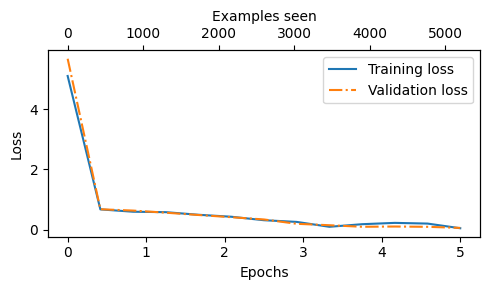

In [86]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))
plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

在训练开始时，我们将 epoch 数量设置为 5。epoch 的具体数量取决于数据集和任务的难度，并没有通用的解决方案或推荐值。5 个 epoch 通常是一个合适的起点。如果在前几个 epoch 后模型出现过拟合迹象（如图 6.16 所示的损失曲线显示验证损失上升），我们可能需要减少 epoch 数量。相反，如果趋势线显示验证损失随着训练仍有下降空间，我们则应增加 epoch 数量。在本例中，5 个 epoch 是合理的选择，因为没有早期过拟合的迹象，且验证损失接近 0。

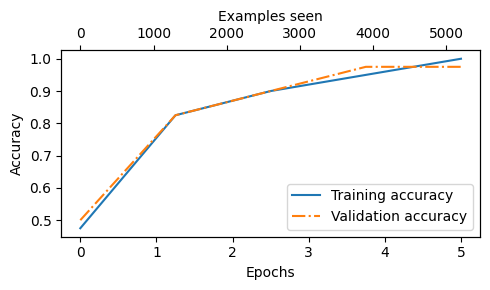

In [87]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_accs))

plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")


训练集和测试集准确率之间的轻微差异表明训练数据的过拟合程度较低。通常，验证集的准确率会略高于测试集的准确率，这是因为模型开发过程中通常会通过调整超参数来优化验证集上的表现，而这种优化未必能有效地泛化到测试集上

In [89]:
model.pos_emb.weight.shape

torch.Size([1024, 768])

In [91]:
# Listing 6.12 Using the model to classify new texts
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
    model.eval()

    input_ids = tokenizer.encode(text)                                   #A
    supported_context_length = model.pos_emb.weight.shape[0]
    # posemb shape: [context_length,embedding_dim]
    input_ids = input_ids[:min(max_length, supported_context_length)]    #B

    input_ids += [pad_token_id] * (max_length - len(input_ids))          #C
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0)   #D

    with torch.no_grad():                                                #E
        logits = model(input_tensor)[:, -1, :]                           #F
    predicted_label = torch.argmax(logits, dim=-1).item()

    return "spam" if predicted_label == 1 else "not spam"                #G


#A 准备模型输入
#B 截断过长序列
#C 填充序列至最长长度
#D 增加批次维度
#E 关闭梯度跟踪，进行模型推理
#F 获取最后一个输出 token 的 logits
#G 返回分类结果

In [92]:
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

print(classify_review(
    text_1, model, tokenizer, device, max_length=train_dataset.max_length
))

spam


In [93]:
text_2 = (
    "Hey, just wanted to check if we're still on"
    " for dinner tonight? Let me know!"
)
print(classify_review(
    text_2, model, tokenizer, device, max_length=train_dataset.max_length
))

not spam


In [ ]:
torch.save(model.state_dict(), "review_classifier.pth")

In [ ]:
model_state_dict = torch.load("review_classifier.pth")
model.load_state_dict(model_state_dict)